# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 1.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

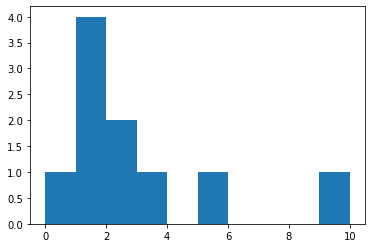

In [9]:
plt.hist(X[1]);

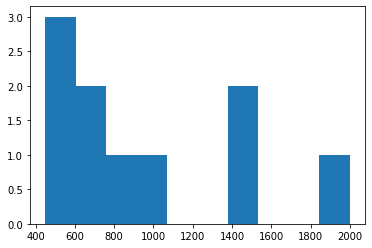

In [10]:
plt.hist(X[2]);

In [11]:
X1_mean = X[1].mean()
X1_mean

2.6

In [12]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [13]:
X_st = X.copy().astype(np.float64)

In [14]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

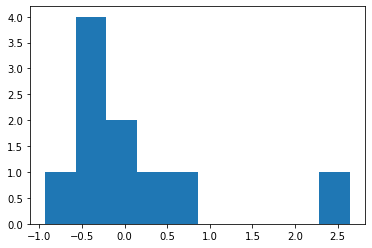

In [15]:
plt.hist(X_st[1]);

In [16]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [17]:
X_st[2] = custom_StandardScaler(X[2])

In [18]:
X_st[3] = custom_StandardScaler(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [19]:
[1, 1, 2, 1, 3, 0, 5, 10, 1, 2]

[1, 1, 2, 1, 3, 0, 5, 10, 1, 2]

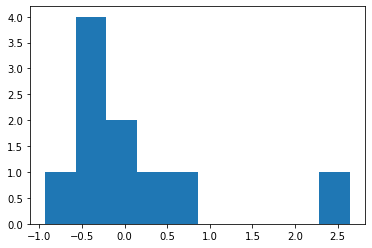

In [20]:
plt.hist(X_st[1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [21]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [22]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [23]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 99.38080009840826, веса: [49.92238024  3.640049    4.32123945  3.62657945]
# итерация: 200, MSE: 41.74817766083695, веса: [56.40832139  4.11138292  3.86410034  3.6610879 ]
# итерация: 300, MSE: 40.446428211513776, веса: [57.26848402  4.48076053  3.46837156  3.69236309]
# итерация: 400, MSE: 40.226507128890525, веса: [57.38255841  4.77990168  3.13641255  3.72923576]
# итерация: 500, MSE: 40.0874642855131, веса: [57.3976869   5.02271447  2.85810406  3.76816476]
# итерация: 600, MSE: 39.992015880363525, веса: [57.39969324  5.22021093  2.6248676   3.8068077 ]
# итерация: 700, MSE: 39.92619764887512, веса: [57.39995932  5.38116282  2.42947305  3.8437016 ]
# итерация: 800, MSE: 39.880718869022516, веса: [57.3999946   5.51257555  2.26583273  3.87799656]
# итерация: 900, MSE: 39.84924232517345, веса: [57.39999928  5.62005828  2.12882527  3.9092631 ]
# итерация: 1000, MSE: 39.82742724275693, веса: [57.39999991  5.70811348  2.01414549  3.93735382]


array([57.39999991,  5.70811348,  2.01414549,  3.93735382])

In [24]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [25]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 39.905880647463235, веса: [57.39628654  5.24971421  2.2795011   4.15492676]
# итерация: 1000, MSE: 39.09202615670807, веса: [57.39814437  5.83554886  1.77736958  4.07420873]
# итерация: 1500, MSE: 38.651288126873624, веса: [57.39792236  6.03184061  1.56740026  4.089545  ]
# итерация: 2000, MSE: 38.44089775634507, веса: [57.39784065  6.10141428  1.48069205  4.10745875]
# итерация: 2500, MSE: 38.34735792538437, веса: [57.39780953  6.12719412  1.44514329  4.11756965]
# итерация: 3000, MSE: 38.307361576164844, веса: [57.39779741  6.13705836  1.43063058  4.12236314]
# итерация: 3500, MSE: 38.29062943630865, веса: [57.39779261  6.14091576  1.42472063  4.12447606]
# итерация: 4000, MSE: 38.283717016470405, веса: [57.39779069  6.1424456   1.42231753  4.12537418]
# итерация: 4500, MSE: 38.28088221937018, веса: [57.39778992  6.14305773  1.42134125  4.12574851]
# итерация: 5000, MSE: 38.279724691819396, веса: [57.39778961  6.14330401  1.42094484  4.1259028 ]


array([57.39778961,  6.14330401,  1.42094484,  4.1259028 ])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [26]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [27]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-4, lambda_=1e-4)

# итерация: 500, MSE: 2742.476167176143, веса: [5.91227705 0.66926476 1.40879763 2.27902736]
# итерация: 1000, MSE: 2240.815372552606, веса: [10.81240749  1.28940466  1.98090485  2.84908304]
# итерация: 1500, MSE: 1835.1825219258876, веса: [15.24616234  1.76739436  2.40977376  3.27823396]
# итерация: 2000, MSE: 1506.0047056033643, веса: [19.25792945  2.13752976  2.73009648  3.60062098]
# итерация: 2500, MSE: 1238.1778157607112, веса: [22.88787199  2.42581103  2.96817209  3.8421247 ]
# итерация: 3000, MSE: 1019.8649312691166, веса: [26.17233055  2.65194948  3.14393707  4.02236386]
# итерация: 3500, MSE: 841.6790378782374, веса: [29.14418696  2.83088901  3.27250454  4.15621022]
# итерация: 4000, MSE: 696.1095953315165, веса: [31.8331935   2.97395935  3.36533117  4.25493691]
# итерация: 4500, MSE: 577.1080496040802, веса: [34.26627074  3.08975047  3.43110171  4.32708911]
# итерация: 5000, MSE: 479.7800883606483, веса: [36.46777703  3.1847753   3.4763996   4.37914393]


array([36.46777703,  3.1847753 ,  3.4763996 ,  4.37914393])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).


Не совсем поняла, какая зависимость, если lambda не меняется при одном вычислении. Решила, что речь идет о, наверное, сквозном сравнении кривых изменения весов признаков при разных вычислениях с разными (я сделала всего два значения) lambda. Шаг итерации, при которой фиксируется новое значение весов - 100.

In [28]:
def eval_reg2_lam(X, y, iterations=5000, alpha=1e-2, lambda_=1e-8):
    iters = []
    weights = []
    errors = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 50) == 0:
#            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
            iters.append(i)
            weights.append(list(W.copy()))
            errors.append(err)
    return iters, weights, errors

In [29]:
eval_1e8 = eval_reg2_lam(X_st, y)

In [30]:
errors_8 =  eval_1e8[2]
iters_8 = eval_1e8[0]
weights_8 = np.array(eval_1e8[1])

In [31]:
eval_1e2 = eval_reg2_lam(X_st, y, lambda_=1e-2)

In [32]:
errors_2 =  eval_1e2[2]
iters_2 = eval_1e2[0]
weights_2 = np.array(eval_1e2[1])

In [33]:
eval_1e4 = eval_reg2_lam(X_st, y, lambda_=1e-4)

In [34]:
errors_4 =  eval_1e4[2]
iters_4 = eval_1e4[0]
weights_4 = np.array(eval_1e4[1])

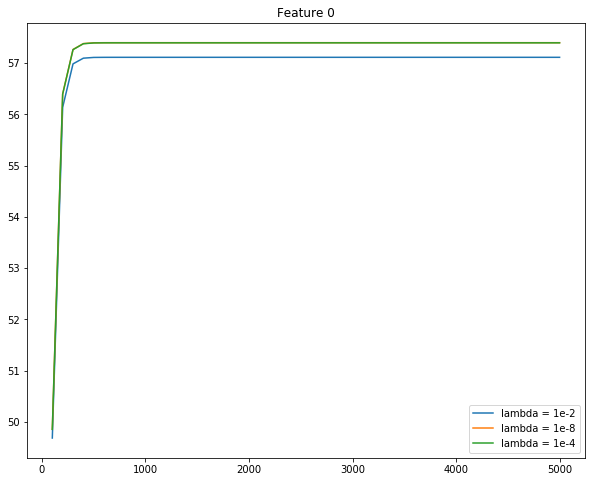

In [35]:
plt.figure(figsize=(10, 8))
plt.title('Feature 0')
plt.plot(iters_2, weights_2[:,0],label='lambda = 1e-2')
plt.plot(iters_8, weights_8[:,0],label='lambda = 1e-8')
plt.plot(iters_4, weights_4[:,0],label='lambda = 1e-4')
plt.legend();

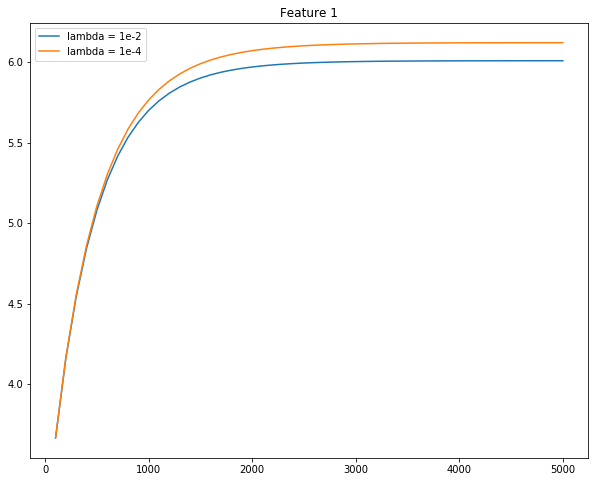

In [36]:
plt.figure(figsize=(10, 8))
plt.title('Feature 1')
plt.plot(iters_2, weights_2[:,1],label='lambda = 1e-2')
#plt.plot(iters_8, weights_8[:,1],label='lambda = 1e-8')
plt.plot(iters_4, weights_4[:,1],label='lambda = 1e-4')
plt.legend();

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Feature 2')
plt.plot(iters_2, weights_2[:,2],label='lambda = 1e-2')
plt.plot(iters_8, weights_8[:,2],label='lambda = 1e-8')
plt.plot(iters_4, weights_4[:,2],label='lambda = 1e-4')
plt.legend();

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Feature 3')
plt.plot(iters_2, weights_2[:,3],label='lambda = 1e-2')
#plt.plot(iters_8, weights_8[:,3],label='lambda = 1e-8')
plt.plot(iters_4, weights_4[:,3],label='lambda = 1e-4')
plt.legend();

**2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**
Наверное, можно. Наример, сначала применить нормализацию => все значения признака расположатся от 0 до 1 в зависимости от удаленности от минимума по признаку. Потом применить стандартизацию, и расположить эти значения от среднего. Но, мне кажется, вряд ли имеет смысл. Цель обоих инструментов в масштабировании признаков, когда их порядки и разброс разнятся.

**3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.**

In [ ]:
X_st_2 = X_st.copy()

In [ ]:
def eval_reg1_lam(X, y, iterations=5000, alpha=1e-2, lambda_=1e-8):
    iters = []
    weights = []
    errors = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_) 
        if i % (iterations / 20) == 0:
#            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
            iters.append(i)
            weights.append(list(W.copy()))
            errors.append(err)
    return iters, weights, errors

In [ ]:
eval_reg1_1e8 = eval_reg1_lam(X_st_2, y)

In [ ]:
errors_reg1_8 =  eval_reg1_1e8[2]
iters_reg1_8 = eval_reg1_1e8[0]
weights_reg1_8 = np.array(eval_reg1_1e8[1])

In [ ]:
eval_reg1_1e2 = eval_reg1_lam(X_st_2, y, lambda_=1e-2)

In [ ]:
errors_reg1_2 =  eval_reg1_1e2[2]
iters_reg1_2 = eval_reg1_1e2[0]
weights_reg1_2 = np.array(eval_reg1_1e2[1])

**comparing weights witn lambda = 1e-2 and lambda = 1e-8**

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Feature 3')
plt.plot(iters_reg1_2, weights_reg1_2[:,3],label='lambda = 1e-2')
plt.plot(iters_reg1_8, weights_reg1_8[:,3],label='lambda = 1e-8')
#plt.plot(iters_4, weights_4[:,3],label='lambda = 1e-4')
plt.legend();

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Feature 0')
plt.plot(iters_reg1_2, weights_reg1_2[:,0],label='lambda = 1e-2')
plt.plot(iters_reg1_8, weights_reg1_8[:,0],label='lambda = 1e-8')
#plt.plot(iters_4, weights_4[:,3],label='lambda = 1e-4')
plt.legend();

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Feature 1')
plt.plot(iters_reg1_2, weights_reg1_2[:,1],label='lambda = 1e-2')
plt.plot(iters_reg1_8, weights_reg1_8[:,1],label='lambda = 1e-8')
#plt.plot(iters_4, weights_4[:,3],label='lambda = 1e-4')
plt.legend();

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Feature 2')
plt.plot(iters_reg1_2, weights_reg1_2[:,2],label='lambda = 1e-2')
plt.plot(iters_reg1_8, weights_reg1_8[:,2],label='lambda = 1e-8')
#plt.plot(iters_4, weights_4[:,3],label='lambda = 1e-4')
plt.legend();

In [ ]:
# comparing L1 and L2 error rates 
plt.figure(figsize=(10, 8))
plt.title('Error curves L1 and L2')
plt.plot(iters_8, errors_8, label='L2')
plt.plot(iters_reg1_8, errors_reg1_8, label='L1')
#plt.plot(iters_4, weights_4[:,3],label='lambda = 1e-4')
plt.legend();